In [ ]:
#1. TIME SERIES PLOT FOR SELECTED STATIONS FOR DIFFERENT RELAXATION TIMES.
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime
plt.style.use('seaborn-poster')

knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/2017_nudging_coupling_test/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn3c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n3c3 = os.path.join(path,'n3c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n3c3_fh = nc.Dataset(flask_n3c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn3c3_obs = np.append(fn3c3_obs,flask_n3c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n3c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'U_fn1c6_obs': fn1c6_obs*1000000,
                   'V_fn6c6_obs': fn6c6_obs*1000000,
                   'W_fndc6_obs': fndc6_obs*1000000,
                   'X_fn6c3_obs': fn6c3_obs*1000000,
                   'Y_fndc3_obs': fndc3_obs*1000000,
                   'Z_fn3c3_obs': fn3c3_obs*1000000},index=obs_num)




In [ ]:
#Select the timeframe to make the plots
df = df[(df.G_date>'2014-12-01') & (df.G_date<'2015-01-01')]

CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) #& (df.D_alt>150) & (df.D_alt<200)#Cabauw in the Netherlands
PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland
#print(df[JFJ])
f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, sharex=True)
size = 2
alpha=.3
mask = LEF
ax1.set_title('LEF')
ax1.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax1.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.plot_date(x=df.G_date[mask], y=df.C_fn1c3_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-n1c3')
ax1.plot_date(x=df.G_date[mask], y=df.Z_fn3c3_obs[mask], color='lightblue', alpha=alpha, ms=size, label='TM5-n3c3')
ax1.plot_date(x=df.G_date[mask], y=df.X_fn6c3_obs[mask], color='c', alpha=alpha, ms=size, label='TM5-n6c3')
ax1.plot_date(x=df.G_date[mask], y=df.Y_fndc3_obs[mask], color='m', alpha=alpha, ms=size, label='TM5-ndc3')
ax1.plot_date(x=df.G_date[mask], y=df.U_fn1c6_obs[mask], color='r', linestyle='--', alpha=alpha, ms=size, label='TM5-n1c6')
ax1.plot_date(x=df.G_date[mask], y=df.V_fn6c6_obs[mask], color='c', linestyle='--',  alpha=alpha, ms=size, label='TM5-n6c6')
ax1.plot_date(x=df.G_date[mask], y=df.W_fndc6_obs[mask], color='m', linestyle='--',  alpha=alpha, ms=size, label='TM5-ndc6')

mask=CBW
ax2.set_title('CBW')
ax2.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax2.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax2.plot_date(x=df.G_date[mask], y=df.C_fn1c3_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-n1c3')
ax2.plot_date(x=df.G_date[mask], y=df.X_fn6c3_obs[mask], color='c', alpha=alpha, ms=size, label='TM5-n6c3')
ax2.plot_date(x=df.G_date[mask], y=df.Y_fndc3_obs[mask], color='m', alpha=alpha, ms=size, label='TM5-ndc3')
ax2.set(ylabel='CO2 concentration (PPM)')

mask=PAL
ax3.set_title('PAL')
ax3.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax3.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax3.plot_date(x=df.G_date[mask], y=df.C_fn1c3_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-n1c3')
ax3.plot_date(x=df.G_date[mask], y=df.X_fn6c3_obs[mask], color='c', alpha=alpha, ms=size, label='TM5-n6c3')
ax3.plot_date(x=df.G_date[mask], y=df.Y_fndc3_obs[mask], color='m', alpha=alpha, ms=size, label='TM5-ndc3')

mask=JFJ
ax4.set_title('JFJ')
ax4.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax4.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax4.plot_date(x=df.G_date[mask], y=df.C_fn1c3_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-n1c3')
ax4.plot_date(x=df.G_date[mask], y=df.X_fn6c3_obs[mask], color='c', alpha=alpha, ms=size, label='TM5-n6c3')
ax4.plot_date(x=df.G_date[mask], y=df.Y_fndc3_obs[mask], color='m', alpha=alpha, ms=size, label='TM5-ndc3')
ax4.set(xlabel='Date')

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale = 5,fontsize='medium')

#plt.savefig('Benchmarkruns_okt_2017/timelines_good_ini.png')
plt.show()

surface-insitu     353669
tower-insitu       246624
aircraft-pfp         3298
surface-flask        3085
surface-pfp          2153
aircraft-flask        537
shipboard-flask        43
Name: H_obs_id, dtype: int64
brm    43713
hun    35576
tac    26084
ces    22717
smr    22605
rgl    17629
jfj    12341
pal     9256
bao     9039
omp     9033
tpd     8964
inu     8907
spo     8841
izo     8823
cps     8823
fsd     8808
brw     8789
sct     8766
hei     8677
osi     8655
tta     8556
owa     8505
mlo     8407
lef     8327
puy     8319
nwr     8310
wkt     8271
lut     8250
smo     8174
ssl     7905
       ...  
sum       47
bhd       45
cib       45
ush       44
bmw       41
wlg       41
eic       41
tap       40
hba       40
crz       39
chr       39
sey       39
uum       38
mex       38
key       36
bkt       34
oxk       34
lmp       31
nmb       31
shm       30
azr       30
mqa       28
maa       28
poc       26
cya       23
cfa       23
drp       17
rk1        8
gpa        7
ota      

/Users/killaars/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "bottom left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))


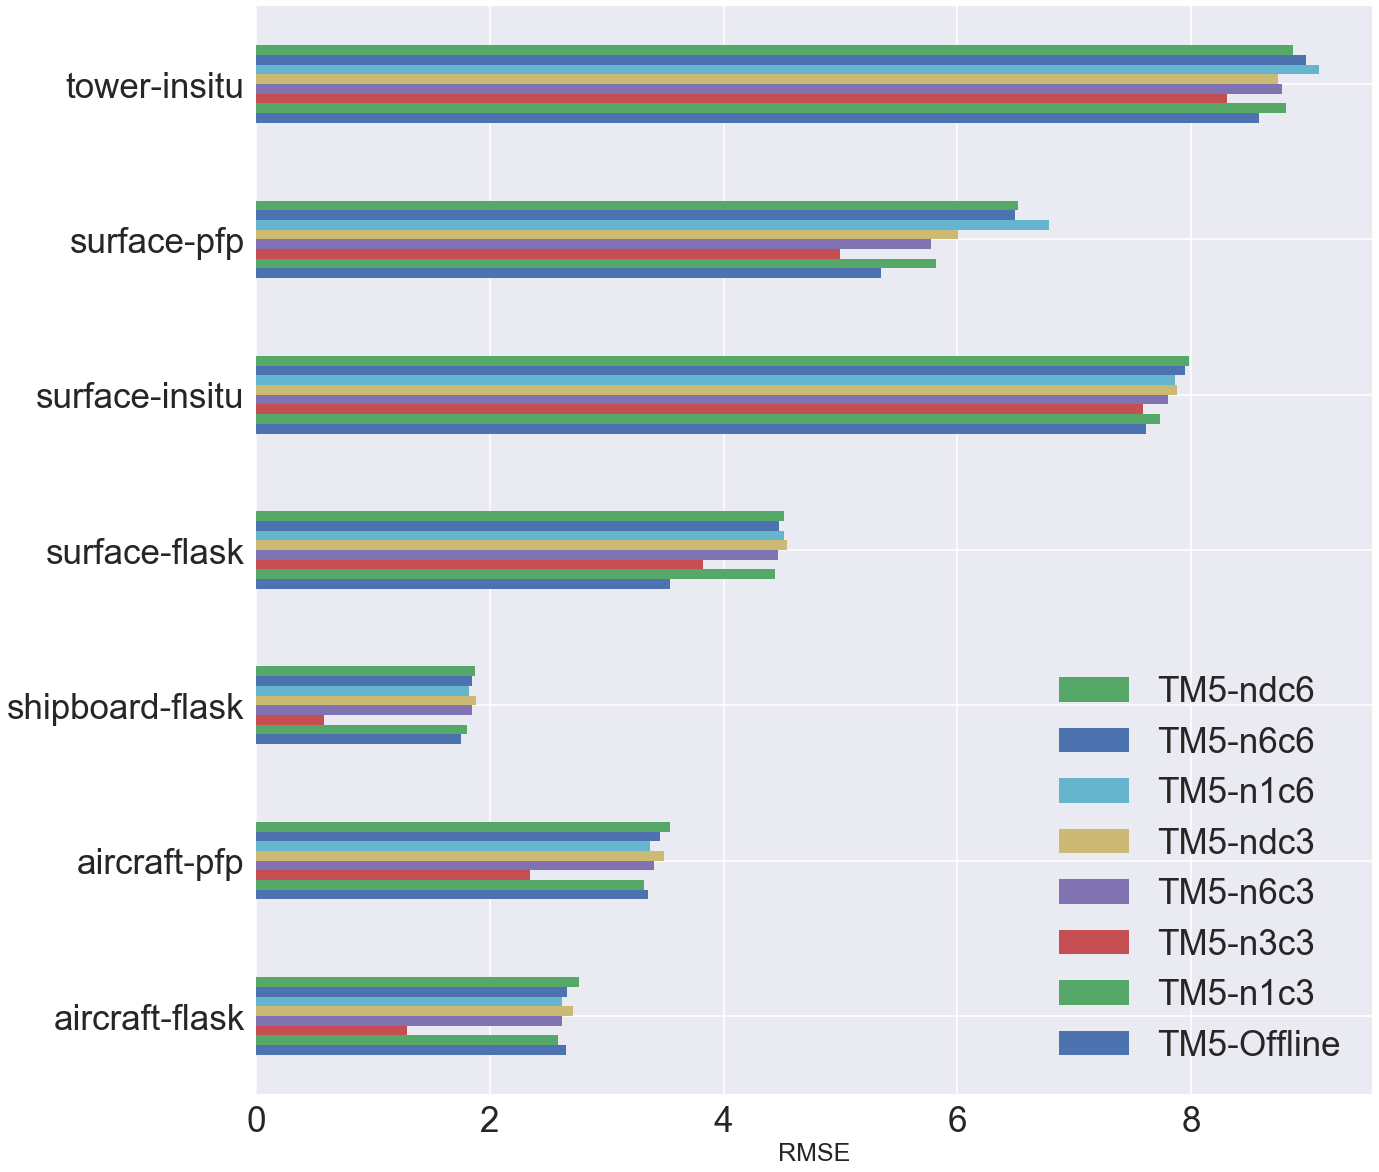

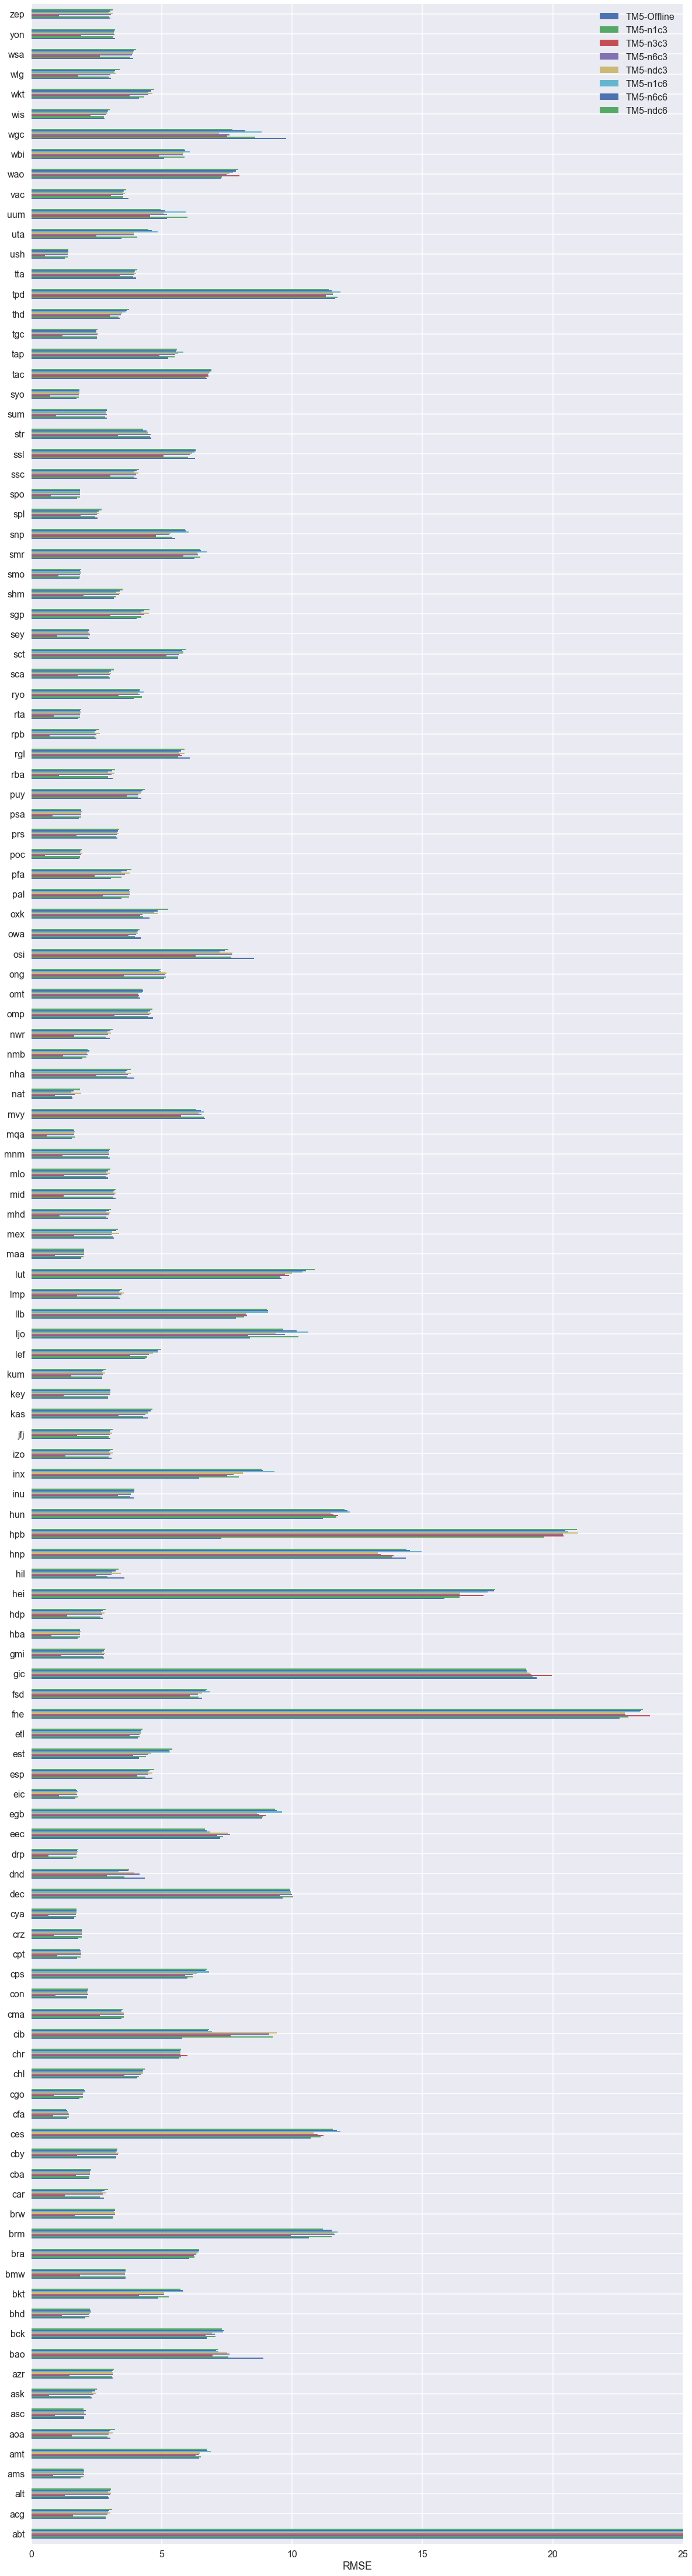

In [7]:
#6 Bar charts with the RMSE of the different stations and different type. 
#  Code extension allows to easily switch the timeseries graph for any chosen station.
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime

plt.style.use('seaborn-poster')


knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/2017_nudging_coupling_test/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn3c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_2014'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n3c3 = os.path.join(path,'n3c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n3c3_fh = nc.Dataset(flask_n3c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn3c3_obs = np.append(fn3c3_obs,flask_n3c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n3c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    


temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'U_fn1c6_obs': fn1c6_obs*1000000,
                   'V_fn6c6_obs': fn6c6_obs*1000000,
                   'W_fndc6_obs': fndc6_obs*1000000,
                   'X_fn6c3_obs': fn6c3_obs*1000000,
                   'Y_fndc3_obs': fndc3_obs*1000000,
                   'Z_fn3c3_obs': fn3c3_obs*1000000},index=obs_num)  
#Select the timeframe to make the plots
df = df[(df.G_date>'2014-01-01') & (df.G_date<'2015-01-01')]

print(df['H_obs_id'].value_counts())
print(df['I_obs_loc'].value_counts())


#remove values with too high observations
df = df[df.A_fin_obs<500]
#calculate difference between models and observations and square it
df['J_TM5_offline'] = (df['B_fmp_obs']-df['A_fin_obs'])**2
df['K_TM5_n1c3'] = (df['C_fn1c3_obs']-df['A_fin_obs'])**2
df['L_TM5_n6c3'] = (df['X_fn6c3_obs']-df['A_fin_obs'])**2
df['M_TM5_ndc3'] = (df['Y_fndc3_obs']-df['A_fin_obs'])**2
df['N_TM5_n1c6'] = (df['U_fn1c6_obs']-df['A_fin_obs'])**2
df['O_TM5_n6c6'] = (df['V_fn6c6_obs']-df['A_fin_obs'])**2
df['P_TM5_ndc6'] = (df['W_fndc6_obs']-df['A_fin_obs'])**2
df['Q_TM5_n3c3'] = (df['Z_fn3c3_obs']-df['A_fin_obs'])**2

#calculation of RMSE for the types of measurements
#group the difference(column-J) by type and give the mean and the count, two dataframes, Offline and ESM
sample_type_off = df['J_TM5_offline'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n1c3 = df['K_TM5_n1c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n6c3 = df['L_TM5_n6c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_ndc3 = df['M_TM5_ndc3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n1c6 = df['N_TM5_n1c6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n6c6 = df['O_TM5_n6c6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_ndc6 = df['P_TM5_ndc6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n3c3 = df['Q_TM5_n3c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
#Merge the two dataframes together
pieces_type = [sample_type_off,sample_type_n1c3,sample_type_n3c3,sample_type_n6c3,sample_type_ndc3,sample_type_n1c6,sample_type_n6c6,sample_type_ndc6]
sample_type=pd.concat(pieces_type,keys=['TM5-Offline','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-n1c6','TM5-n6c6','TM5-ndc6'])
#Calculate the RMSE by giving the sqrt of the mean (mean was the square of the differences for each type)
sample_type['RMSE']=np.sqrt(sample_type['mean'])

#calculation of RMSE of the different locations of measurement, see above for method
#Use only stations with 20 or more measurements
count_loc = df['I_obs_loc'].value_counts()
count_loc[count_loc > 19]
df_loc = df[df['I_obs_loc'].isin(count_loc[count_loc > 9].index)]
sample_loc_off = df_loc['J_TM5_offline'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n1c3 = df_loc['K_TM5_n1c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n6c3 = df_loc['L_TM5_n6c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_ndc3 = df_loc['M_TM5_ndc3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n1c6 = df_loc['N_TM5_n1c6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n6c6 = df_loc['O_TM5_n6c6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_ndc6 = df_loc['P_TM5_ndc6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n3c3 = df_loc['Q_TM5_n3c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
pieces_loc = [sample_loc_off,sample_loc_n1c3,sample_loc_n3c3,sample_loc_n6c3,sample_loc_ndc3,sample_loc_n1c6,sample_loc_n6c6,sample_loc_ndc6]
sample_loc=pd.concat(pieces_loc,keys=['TM5-Offline','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-n1c6','TM5-n6c6','TM5-ndc6'])
sample_loc['RMSE']=np.sqrt(sample_loc['mean'])


#Plot the dataframes in barplots. First unstack them, keeping only the RMSE
plot_type=sample_type['RMSE'].unstack(level=0)
plot_type.index.name = '' #Setting the index name to '', otherwise the name is printed as label
ax1 = plot_type.plot.barh(figsize=(20,20),title='',fontsize=25,legend=False)
handles, labels = ax1.get_legend_handles_labels()
lgd=ax1.legend(handles[::-1], labels[::-1],loc='bottom left', markerscale = 5,fontsize='35')
ax1.set_xlabel("RMSE",fontsize=25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(35)
#plt.savefig('BBOS - RMSE_type.png',dpi=300)

plot_loc=sample_loc['RMSE'].unstack(level=0)
plot_loc.index.name = ''
ax2 = plot_loc.plot.barh(figsize=(20,80))
ax2.set_xlabel("RMSE")
plt.xlim(0,25)
#plt.savefig('RMSE_stations.png',dpi=300)
plt.show()

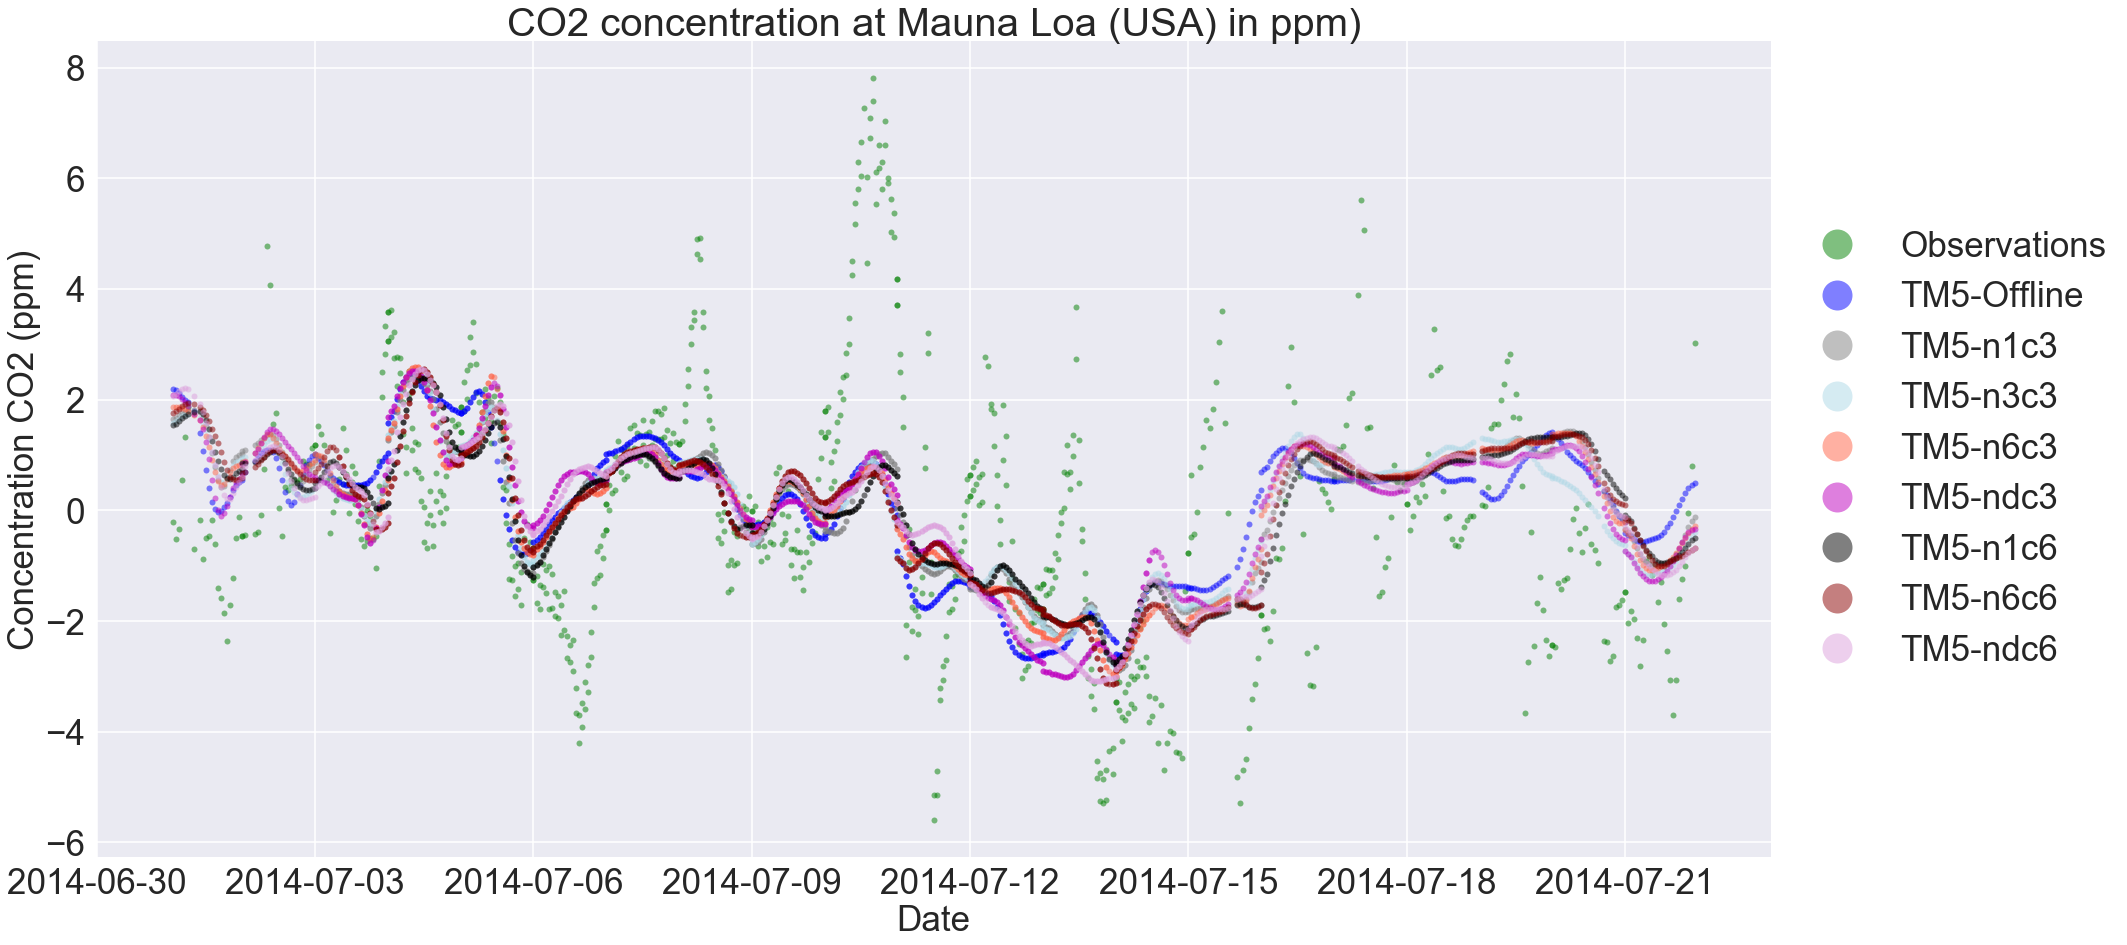

In [17]:
# Timeseries of chosen plot (comparable to figure 1), uses the data calculated by the previous block. 
# Can afterwards be run multiple times for chosen stations
df = df[(df.G_date>'2014-07-01') & (df.G_date<'2014-07-22')]
f, (ax1) = plt.subplots(1, 1, sharex=True,figsize=(30, 15))
size = 6
alpha=.5
mask_loc = 'jfj'
mask = (df.I_obs_loc==mask_loc)
ax1.set_title("CO2 concentration at Mauna Loa (USA) in ppm)",fontsize=40)
ax1.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask]-df.A_fin_obs[mask].mean(), color='g', alpha=alpha, ms=size, label='Observations')
ax1.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask]-df.B_fmp_obs[mask].mean(), color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.plot_date(x=df.G_date[mask], y=df.C_fn1c3_obs[mask]-df.C_fn1c3_obs[mask].mean(), color='0.5', alpha=alpha, ms=size, label='TM5-n1c3')
ax1.plot_date(x=df.G_date[mask], y=df.Z_fn3c3_obs[mask]-df.Z_fn3c3_obs[mask].mean(), color='lightblue', alpha=alpha, ms=size, label='TM5-n3c3')
ax1.plot_date(x=df.G_date[mask], y=df.X_fn6c3_obs[mask]-df.X_fn6c3_obs[mask].mean(), color='tomato', alpha=alpha, ms=size, label='TM5-n6c3')
ax1.plot_date(x=df.G_date[mask], y=df.Y_fndc3_obs[mask]-df.Y_fndc3_obs[mask].mean(), color='m',alpha=alpha, ms=size, label='TM5-ndc3')
ax1.plot_date(x=df.G_date[mask], y=df.U_fn1c6_obs[mask]-df.U_fn1c6_obs[mask].mean(), color='0', alpha=alpha, ms=size, label='TM5-n1c6')
ax1.plot_date(x=df.G_date[mask], y=df.V_fn6c6_obs[mask]-df.V_fn6c6_obs[mask].mean(), color='darkred', alpha=alpha, ms=size, label='TM5-n6c6')
ax1.plot_date(x=df.G_date[mask], y=df.W_fndc6_obs[mask]-df.W_fndc6_obs[mask].mean(), color='plum', alpha=alpha, ms=size, label='TM5-ndc6')

ax1.set_ylabel('Concentration CO2 (ppm)', fontsize=35)
ax1.set_xlabel('Date', fontsize=35)

ax1.set_ylabel('Concentration CO2 (ppm)', fontsize=35)
ax1.set_xlabel('Date', fontsize=35)
lgd=ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale = 5,fontsize='35')
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(35)
plt.show()

In [ ]:
#LT - UT ΔCO2 Concentration (ppm)
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime
plt.style.use('seaborn-poster')

knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)        
temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'U_fn1c6_obs': fn1c6_obs*1000000,
                   'V_fn6c6_obs': fn6c6_obs*1000000,
                   'W_fndc6_obs': fndc6_obs*1000000,
                   'X_fn6c3_obs': fn6c3_obs*1000000,
                   'Y_fndc3_obs': fndc3_obs*1000000},index=obs_num)
#Select the timeframe to make the plots
#df = df[(df.G_date>'2014-12-01') & (df.G_date<'2015-01-01')]


df = df[(df.A_fin_obs<450) & (df.A_fin_obs>350)]
df = df[(df.H_obs_id=='aircraft-flask') | (df.H_obs_id=='aircraft-pfp') | (df.H_obs_id=='aircraft-insitu')]
print(df.H_obs_id.value_counts())
print(df.I_obs_loc.value_counts())
#df = df[df.I_obs_loc != 'con']
print(df.I_obs_loc.value_counts())

#Select the altitude to make the plots
df = df[(df.D_alt<3000) | (df.D_alt>3000) & (df.D_alt<7000)]
#Create new column, everything lower than 2000m is in the LT and the rest is in the UT
df['J_tropo'] = np.where(df['D_alt']<3000, 'LT', 'UT')

df['month'] = pd.DatetimeIndex(df['G_date']).month

LT_df = df[df.J_tropo=='LT']
UT_df = df[df.J_tropo=='UT']

UT_mean = UT_df.groupby(UT_df['month']).mean()
UT_mean = UT_mean[['A_fin_obs','B_fmp_obs','C_fn1c3_obs','U_fn1c6_obs','V_fn6c6_obs','W_fndc6_obs','X_fn6c3_obs','Y_fndc3_obs']]
UT_count = UT_df.groupby(UT_df['month']).count()
UT_count = UT_count[['A_fin_obs','B_fmp_obs','C_fn1c3_obs','U_fn1c6_obs','V_fn6c6_obs','W_fndc6_obs','X_fn6c3_obs','Y_fndc3_obs']]
UT_std = UT_df.groupby(UT_df['month']).std()
UT_std = UT_std[['A_fin_obs','B_fmp_obs','C_fn1c3_obs','U_fn1c6_obs','V_fn6c6_obs','W_fndc6_obs','X_fn6c3_obs','Y_fndc3_obs']]
UT_ste = UT_std/(np.sqrt(UT_count))

LT_mean = LT_df.groupby(LT_df['month']).mean()
LT_mean = LT_mean[['A_fin_obs','B_fmp_obs','C_fn1c3_obs','U_fn1c6_obs','V_fn6c6_obs','W_fndc6_obs','X_fn6c3_obs','Y_fndc3_obs']]
LT_count = LT_df.groupby(LT_df['month']).count()
LT_count = LT_count[['A_fin_obs','B_fmp_obs','C_fn1c3_obs','U_fn1c6_obs','V_fn6c6_obs','W_fndc6_obs','X_fn6c3_obs','Y_fndc3_obs']]
LT_std = LT_df.groupby(LT_df['month']).std()
LT_std = LT_std[['A_fin_obs','B_fmp_obs','C_fn1c3_obs','U_fn1c6_obs','V_fn6c6_obs','W_fndc6_obs','X_fn6c3_obs','Y_fndc3_obs']]
LT_ste = LT_std/(np.sqrt(LT_count))

LT_UT_mean = LT_mean-UT_mean
LT_UT_ste = np.sqrt(UT_ste**2 + LT_ste**2)
#print(LT_UT_mean)
#print(LT_UT_ste)

f, (ax1) = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(24,10))
size = 2
alpha=.3
months = 1+np.arange(12)

ax1.set_title("LT - UT ΔCO2 Concentration during the year",fontsize=28)
ax1.plot(months,LT_UT_mean['A_fin_obs'], color = 'g', ms=size,label='Observations')
ax1.fill_between(months, LT_UT_mean['A_fin_obs']-LT_UT_ste['A_fin_obs'], LT_UT_mean['A_fin_obs']+LT_UT_ste['A_fin_obs'],
    alpha=0.5, edgecolor='g', facecolor='g')
ax1.plot(months,LT_UT_mean['B_fmp_obs'], color = 'b', ms=size,label='TM5-Offline')
ax1.fill_between(months, LT_UT_mean['B_fmp_obs']-LT_UT_ste['B_fmp_obs'], LT_UT_mean['B_fmp_obs']+LT_UT_ste['B_fmp_obs'],
    alpha=0.5, edgecolor='b', facecolor='b')
ax1.plot(months,LT_UT_mean['C_fn1c3_obs'], color = '0.5', ms=size,label='TM5-n1c3')
ax1.fill_between(months, LT_UT_mean['C_fn1c3_obs']-LT_UT_ste['C_fn1c3_obs'], LT_UT_mean['C_fn1c3_obs']+LT_UT_ste['C_fn1c3_obs'],
    alpha=0.5, edgecolor='0.5', facecolor='0.5')
ax1.plot(months,LT_UT_mean['U_fn1c6_obs'], color = '0', ms=size,label='TM5-n1c6')
ax1.fill_between(months, LT_UT_mean['U_fn1c6_obs']-LT_UT_ste['U_fn1c6_obs'], LT_UT_mean['U_fn1c6_obs']+LT_UT_ste['U_fn1c6_obs'],
    alpha=0.5, edgecolor='0', facecolor='0')
ax1.plot(months,LT_UT_mean['V_fn6c6_obs'], color = 'darkred', ms=size,label='TM5-n6c6')
ax1.fill_between(months, LT_UT_mean['V_fn6c6_obs']-LT_UT_ste['V_fn6c6_obs'], LT_UT_mean['V_fn6c6_obs']+LT_UT_ste['V_fn6c6_obs'],
    alpha=0.5, edgecolor='darkred', facecolor='darkred')
ax1.plot(months,LT_UT_mean['W_fndc6_obs'], color = 'plum', ms=size,label='TM5-ndc6')
ax1.fill_between(months, LT_UT_mean['W_fndc6_obs']-LT_UT_ste['W_fndc6_obs'], LT_UT_mean['W_fndc6_obs']+LT_UT_ste['W_fndc6_obs'],
    alpha=0.5, edgecolor='plum', facecolor='plum')
ax1.plot(months,LT_UT_mean['X_fn6c3_obs'], color = 'tomato', ms=size,label='TM5-n6c3')
ax1.fill_between(months, LT_UT_mean['X_fn6c3_obs']-LT_UT_ste['X_fn6c3_obs'], LT_UT_mean['X_fn6c3_obs']+LT_UT_ste['X_fn6c3_obs'],
    alpha=0.5, edgecolor='tomato', facecolor='tomato')
ax1.plot(months,LT_UT_mean['Y_fndc3_obs'], color = 'm', ms=size,label='TM5-ndc3')
ax1.fill_between(months, LT_UT_mean['Y_fndc3_obs']-LT_UT_ste['Y_fndc3_obs'], LT_UT_mean['Y_fndc3_obs']+LT_UT_ste['Y_fndc3_obs'],
    alpha=0.5, edgecolor='m', facecolor='m')
ax1.set_xlabel('Months of year', fontsize=25)
ax1.set_ylabel('LT - UT ΔCO2 Concentration (ppm)',fontsize=25)
lgd=ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(25)
plt.savefig('BBOS - delta concentration all flight data.png',dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

In [ ]:
f, (ax1) = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(24,10))
size = 2
alpha=.3
months = 1+np.arange(12)
ax1.set_title("LT - UT ΔCO2 Concentration during the year")
ax1.plot(months,LT_UT_mean['A_fin_obs'], color = 'g', ms=size,label='Observations')
#ax1.fill_between(months, LT_UT_mean['A_fin_obs']-LT_UT_ste['A_fin_obs'], LT_UT_mean['A_fin_obs']+LT_UT_ste['A_fin_obs'],
#    alpha=0.5, edgecolor='g', facecolor='g')
ax1.plot(months,LT_UT_mean['B_fmp_obs'], color = 'b', ms=size,label='TM5-Offline')
#ax1.fill_between(months, LT_UT_mean['B_fmp_obs']-LT_UT_ste['B_fmp_obs'], LT_UT_mean['B_fmp_obs']+LT_UT_ste['B_fmp_obs'],
#    alpha=0.5, edgecolor='b', facecolor='b')
ax1.plot(months,LT_UT_mean['C_fn1c3_obs'], color = '0.5', ms=size,label='TM5-n1c3')
#ax1.fill_between(months, LT_UT_mean['C_fn1c3_obs']-LT_UT_ste['C_fn1c3_obs'], LT_UT_mean['C_fn1c3_obs']+LT_UT_ste['C_fn1c3_obs'],
#    alpha=0.5, edgecolor='0.5', facecolor='0.5')
ax1.plot(months,LT_UT_mean['U_fn1c6_obs'], color = '0', ms=size,label='TM5-n1c6')
#ax1.fill_between(months, LT_UT_mean['U_fn1c6_obs']-LT_UT_ste['U_fn1c6_obs'], LT_UT_mean['U_fn1c6_obs']+LT_UT_ste['U_fn1c6_obs'],
#    alpha=0.5, edgecolor='0', facecolor='0')
ax1.plot(months,LT_UT_mean['V_fn6c6_obs'], color = 'darkred', ms=size,label='TM5-n6c6')
#ax1.fill_between(months, LT_UT_mean['V_fn6c6_obs']-LT_UT_ste['V_fn6c6_obs'], LT_UT_mean['V_fn6c6_obs']+LT_UT_ste['V_fn6c6_obs'],
#    alpha=0.5, edgecolor='darkred', facecolor='darkred')
ax1.plot(months,LT_UT_mean['W_fndc6_obs'], color = 'plum', ms=size,label='TM5-ndc6')
#ax1.fill_between(months, LT_UT_mean['W_fndc6_obs']-LT_UT_ste['W_fndc6_obs'], LT_UT_mean['W_fndc6_obs']+LT_UT_ste['W_fndc6_obs'],
#    alpha=0.5, edgecolor='plum', facecolor='plum')
ax1.plot(months,LT_UT_mean['X_fn6c3_obs'], color = 'tomato', ms=size,label='TM5-n6c3')
#ax1.fill_between(months, LT_UT_mean['X_fn6c3_obs']-LT_UT_ste['X_fn6c3_obs'], LT_UT_mean['X_fn6c3_obs']+LT_UT_ste['X_fn6c3_obs'],
#    alpha=0.5, edgecolor='tomato', facecolor='tomato')
ax1.plot(months,LT_UT_mean['Y_fndc3_obs'], color = 'm', ms=size,label='TM5-ndc3')
#ax1.fill_between(months, LT_UT_mean['Y_fndc3_obs']-LT_UT_ste['Y_fndc3_obs'], LT_UT_mean['Y_fndc3_obs']+LT_UT_ste['Y_fndc3_obs'],
#    alpha=0.5, edgecolor='m', facecolor='m')
ax1.set_xlabel('Months of year')
ax1.set_ylabel('LT - UT ΔCO2 Concentration (ppm)')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(18)
#plt.savefig('delta concentration all flight data.png',dpi=300)

plt.show()

In [ ]:
# - Calculating amplitude using CCG-Curve
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime
from mpl_toolkits.basemap import Basemap

from datetime import datetime as datetime_dt
import time
def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = datetime_dt(year=year, month=1, day=1)
    startOfNextYear = datetime_dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

sys.path.insert(0, '/Users/killaars/bin/ccgcrv/')
from ccgcrv import ccgcrv

knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time_obs = []
dates=[]
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            dates_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
                dates_intermediate[i] = dt
            time_obs = np.append(time_obs,time_intermediate)
            dates = np.append(dates,dates_intermediate)       
temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time_obs,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'J_dates'   : dates,
                   'U_fn1c6_obs': fn1c6_obs*1000000,
                   'V_fn6c6_obs': fn6c6_obs*1000000,
                   'W_fndc6_obs': fndc6_obs*1000000,
                   'X_fn6c3_obs': fn6c3_obs*1000000,
                   'Y_fndc3_obs': fndc3_obs*1000000},index=obs_num)
#Select the timeframe to make the plots
#df = df[(df.G_date>'2014-12-01') & (df.G_date<'2015-01-01')]


df = df[(df.A_fin_obs<500) & (df.A_fin_obs>350)]

#Use only stations with 10 or more measurements
count_loc = df['I_obs_loc'].value_counts()
df = df[df['I_obs_loc'].isin(count_loc[count_loc > 9].index)]

plot_df = df[['E_lat','F_lon']].groupby(df['I_obs_loc']).mean()
print(plot_df)

plot_df['amp_obs'] = ''
plot_df['amp_mp'] = ''
plot_df['amp_n1c3'] = ''
plot_df['amp_n1c6'] = ''
plot_df['amp_n6c3'] = ''
plot_df['amp_n6c6'] = ''
plot_df['amp_ndc3'] = ''
plot_df['amp_ndc6'] = ''
for loc in plot_df.index.values:
    print(loc)
    loop_df = df[df.I_obs_loc==loc]
    loop_df = loop_df.set_index(loop_df.G_date)
    loop_df['fracyear'] = loop_df.J_dates.apply(toYearFraction)
    
    years_obs,ampmin_obs,ampmax_obs=ccgcrv(x=loop_df.fracyear.values,y=loop_df.A_fin_obs.values,func='amp')
    amp_obs = np.array(ampmax_obs)-np.array(ampmin_obs)
    amp_obs = np.mean(amp_obs[1:3])

    years_mp,ampmin_mp,ampmax_mp=ccgcrv(x=loop_df.fracyear.values,y=loop_df.B_fmp_obs.values,func='amp')
    amp_mp = np.array(ampmax_mp)-np.array(ampmin_mp)
    amp_mp = np.mean(amp_mp[1:3])

    years_n1c3,ampmin_n1c3,ampmax_n1c3=ccgcrv(x=loop_df.fracyear.values,y=loop_df.C_fn1c3_obs.values,func='amp')
    amp_n1c3 = np.array(ampmax_n1c3)-np.array(ampmin_n1c3)
    amp_n1c3 = np.mean(amp_n1c3[1:3])
    
    years_n1c6,ampmin_n1c6,ampmax_n1c6=ccgcrv(x=loop_df.fracyear.values,y=loop_df.C_fn1c6_obs.values,func='amp')
    amp_n1c6 = np.array(ampmax_n1c6)-np.array(ampmin_n1c6)
    amp_n1c6 = np.mean(amp_n1c6[1:3])
    
    years_n6c3,ampmin_n6c3,ampmax_n6c3=ccgcrv(x=loop_df.fracyear.values,y=loop_df.C_fn6c3_obs.values,func='amp')
    amp_n6c3 = np.array(ampmax_n6c3)-np.array(ampmin_n6c3)
    amp_n6c3 = np.mean(amp_n6c3[1:3])
    
    years_n6c6,ampmin_n6c6,ampmax_n6c6=ccgcrv(x=loop_df.fracyear.values,y=loop_df.C_fn6c6_obs.values,func='amp')
    amp_n6c6 = np.array(ampmax_n6c6)-np.array(ampmin_n6c6)
    amp_n6c6 = np.mean(amp_n6c6[1:3])
    
    years_ndc3,ampmin_ndc3,ampmax_ndc3=ccgcrv(x=loop_df.fracyear.values,y=loop_df.C_fndc3_obs.values,func='amp')
    amp_ndc3 = np.array(ampmax_ndc3)-np.array(ampmin_ndc3)
    amp_ndc3 = np.mean(amp_ndc3[1:3])
        
    years_ndc6,ampmin_ndc6,ampmax_ndc6=ccgcrv(x=loop_df.fracyear.values,y=loop_df.C_fndc6_obs.values,func='amp')
    amp_ndc6 = np.array(ampmax_ndc6)-np.array(ampmin_ndc6)
    amp_ndc6 = np.mean(amp_ndc6[1:3])
    
    plot_df.set_value(loc, 'amp_obs', amp_obs)
    plot_df.set_value(loc, 'amp_mp', amp_mp)
    plot_df.set_value(loc, 'amp_n1c3', amp_n1c3)
    plot_df.set_value(loc, 'amp_n1c6', amp_n1c6)
    plot_df.set_value(loc, 'amp_n6c3', amp_n6c3)
    plot_df.set_value(loc, 'amp_n6c6', amp_n6c6)
    plot_df.set_value(loc, 'amp_ndc3', amp_ndc3)
    plot_df.set_value(loc, 'amp_ndc6', amp_ndc6)
print(plot_df)


In [ ]:
#9 - Calculating amplitude using CCG-Curve
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime
from mpl_toolkits.basemap import Basemap

from datetime import datetime as datetime_dt
import time
def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = datetime_dt(year=year, month=1, day=1)
    startOfNextYear = datetime_dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

sys.path.insert(0, '/Users/killaars/bin/ccgcrv/')
from ccgcrv import ccgcrv

knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time_obs = []
dates=[]
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
#        if file.startswith('sample_coordinates_200801'):
        if file.startswith('sample_coordinates_2014'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            dates_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
                dates_intermediate[i] = dt
            time_obs = np.append(time_obs,time_intermediate)
            dates = np.append(dates,dates_intermediate)
temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time_obs,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'J_dates'   : dates},index=obs_num)

df = df[(df.A_fin_obs<500) & (df.A_fin_obs>350)]

#Use only stations with 10 or more measurements
count_loc = df['I_obs_loc'].value_counts()
df = df[df['I_obs_loc'].isin(count_loc[count_loc > 19].index)]

plot_df = df[['E_lat','F_lon']].groupby(df['I_obs_loc']).mean()
#print(plot_df)

plot_df['amp_obs'] = ''
plot_df['amp_mp'] = ''
plot_df['amp_n1c3'] = ''
for loc in plot_df.index.values:
    print(loc)
    loop_df = df[df.I_obs_loc==loc]
    loop_df = loop_df.set_index(loop_df.G_date)
    loop_df['fracyear'] = loop_df.J_dates.apply(toYearFraction)
    
    years_obs,ampmin_obs,ampmax_obs=ccgcrv(x=loop_df.fracyear.values,y=loop_df.A_fin_obs.values,func='amp')
    print(years_obs,ampmin_obs,ampmax_obs)
    amp_obs = np.array(ampmax_obs)-np.array(ampmin_obs)
    #amp_obs = np.mean(amp_obs[1:3])
    print(amp_obs)

    years_mp,ampmin_mp,ampmax_mp=ccgcrv(x=loop_df.fracyear.values,y=loop_df.B_fmp_obs.values,func='amp')
    amp_mp = np.array(ampmax_mp)-np.array(ampmin_mp)
    #amp_mp = np.mean(amp_mp[1:3])
    print(amp_mp)

    years_n1c3,ampmin_n1c3,ampmax_n1c3=ccgcrv(x=loop_df.fracyear.values,y=loop_df.C_fn1c3_obs.values,func='amp')
    amp_n1c3 = np.array(ampmax_n1c3)-np.array(ampmin_n1c3)
    #amp_n1c3 = np.mean(amp_n1c3[1:3])
    print(amp_n1c3)
    
    plot_df.set_value(loc, 'amp_obs', amp_obs)
    plot_df.set_value(loc, 'amp_mp', amp_mp)
    plot_df.set_value(loc, 'amp_n1c3', amp_n1c3)
    
print(plot_df)
plot_df['offline-n1c3'] = plot_df['amp_mp']-plot_df['amp_n1c3']
plot_df['obs-offline'] = plot_df['amp_obs']-plot_df['amp_mp']

In [ ]:
#plot_df['amp_obs']['shm']=plot_df['amp_obs']['shm'][0]
#plot_df['amp_obs']['shm']=plot_df['amp_obs']['shm'][0]
plot_df['amp_mp']['shm']=plot_df['amp_mp']['shm'][0]
plot_df['amp_n1c3']['shm']=plot_df['amp_n1c3']['shm'][0]
plot_df['offline-n1c3']['shm']=plot_df['offline-n1c3']['shm'][0]
plot_df['obs-offline']['shm']=plot_df['obs-offline']['shm'][0]
print(plot_df.columns)

In [ ]:
plt.figure(figsize=(20,10))
m = Basemap(projection='moll',lon_0=0,resolution='c')
m.shadedrelief(alpha=.5)
#m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
#parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
#m.drawparallels(parallels,labels=[False,False,False,False],color='lightgrey')
# Draw Meridians and Labels
#meridians = np.arange(-180.,181.,20.)
#m.drawmeridians(meridians,labels=[False,False,False,False],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Amplitude of CO2 concentration from observations (ppm)", fontsize=18)
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
#min_value = np.min(plot_df['amp_obs'].values)
#max_value = np.max(plot_df['amp_obs'].values)
min_value=0
max_value=50
print(plot_df['F_lon'].values)
print(np.shape(plot_df['E_lat'].values))
print(x)
print(y)
print(plot_df['amp_obs'].values)
test=np.arange(126)
print(np.shape(test))
sc = plt.scatter(x,y, c=plot_df['amp_obs'].values, vmin=min_value, vmax =max_value, cmap=jet, s=30, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('')
#plt.savefig('ccgcrv_amplitude_observations.png',dpi=300)
plt.show()

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',lon_0=0,resolution='c')
m.shadedrelief(alpha=.5)
#m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
#parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
#m.drawparallels(parallels,labels=[False,False,False,False],color='lightgrey')
# Draw Meridians and Labels
#meridians = np.arange(-180.,181.,20.)
#m.drawmeridians(meridians,labels=[False,False,False,False],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Amplitude of CO2 concentration for TM5-offline (ppm)", fontsize=18)
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
#min_value = np.min(plot_df['amp_mp'].values)
#max_value = np.max(plot_df['amp_mp'].values)
min_value=0
max_value=50
sc = plt.scatter(x,y, c=plot_df['amp_mp'].values, vmin=min_value, vmax =max_value, cmap=jet, s=30, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('')
#plt.savefig('ccgcrv_amplitude_TM5-offline.png',dpi=300)
plt.show()

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',lon_0=0,resolution='c')
m.shadedrelief(alpha=.5)
#m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
#parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
#m.drawparallels(parallels,labels=[False,False,False,False],color='lightgrey')
# Draw Meridians and Labels
#meridians = np.arange(-180.,181.,20.)
#m.drawmeridians(meridians,labels=[False,False,False,False],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Amplitude of CO2 concentration for TM5-ESM (ppm)", fontsize=18)
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
#min_value = np.min(plot_df['amp_n1c3'].values)
#max_value = np.max(plot_df['amp_n1c3'].values)
min_value=0
max_value=50
sc = plt.scatter(x,y, c=plot_df['amp_n1c3'].values, vmin=min_value, vmax =max_value, cmap=jet, s=30, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('')
#plt.savefig('ccgcrv_amplitude_tm5-esm.png',dpi=300)
plt.show()

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',lon_0=0,resolution='c')
m.shadedrelief(alpha=.5)
#m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
#parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
#m.drawparallels(parallels,labels=[False,False,False,False],color='lightgrey')
# Draw Meridians and Labels
#meridians = np.arange(-180.,181.,20.)
#m.drawmeridians(meridians,labels=[False,False,False,False],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Difference of the amplitude of CO2 concentration between TM5-Offline and TM5-ESM (ppm)", fontsize=18)
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
min_value = -5
#max_value = np.max(plot_df['offline-n1c3'].values)
max_value=5
sc = plt.scatter(x,y, c=plot_df['offline-n1c3'].values, vmin=min_value, vmax =max_value, cmap=jet, s=30, edgecolors='none')
# And let's include that colorbar 
cbar = plt.colorbar(sc, shrink = .5)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('')
#plt.savefig('ccgcrv_amplitude_difference_MP_ESM.png',dpi=300)
plt.show()

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',lon_0=0,resolution='c')
m.shadedrelief(alpha=.5)
#m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
#parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
#m.drawparallels(parallels,labels=[False,False,False,False],color='lightgrey')
# Draw Meridians and Labels
#meridians = np.arange(-180.,181.,20.)
#m.drawmeridians(meridians,labels=[False,False,False,False],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Difference of the amplitude of CO2 concentration between the observations and TM5-Offline (ppm)", fontsize=18)
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
min_value = -5
#max_value = np.max(plot_df['obs-offline'].values)
max_value=5
sc = plt.scatter(x,y, c=plot_df['obs-offline'].values, vmin=min_value, vmax =max_value, cmap=jet, s=30, edgecolors='none')
# And let's include that colorbar 
cbar = plt.colorbar(sc, shrink = .5)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('')
#plt.savefig('ccgcrv_amplitude_difference_obs_MP.png',dpi=300)
plt.show()
print(np.sort(plot_df['offline-n1c3'].values))
